In [ ]:
#%matplotlib widget
#%matplotlib ipympl
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

'''
from matplotlib.ticker import LogFormatter 
from matplotlib import ticker, cm
import matplotlib as mpl
import copy
import os
import h5py
import json
import PyPDF2                       
import glob                         
from collections.abc import Iterable
import succolib as suc
import math
'''

import sys 
Swan_h = ("swan" in sys.executable) or ("cern" in sys.executable)
# print('Swan ', Swan_h)

import ipympl
%matplotlib widget

from utils_tb_2025_06_eboost import *


## Specific run

In [2]:
######################## MATERIAL AND YEAR #####################
year = 2024
material = 'W_1.5mm'
######################## SET RUN NUMBER #####################
# run_scan = [720583,720619,720620,720621,720622,720623,720624] ##Scan Crad 
# run_scan = [720623,720625,720626,720627,720628,720629,720630,720631,720632] ##Scan Rot 
run_scan = [720648,720640] ##Scan Rot 
if len(run_scan)>1: run = np.min(run_scan)
######################## SET CUT AND SELECTIONS #####################

Calibration = True
bins_2d = [100,100]
calo_th = 0.1

n_bin_calo = np.arange(calo_th,6.5,0.05)
Cut_pos = True
chamb_dim = [0,10]

if Cut_pos:
    # pos_cut_x= [4.9 ,4.9+0.8] 
    # pos_cut_y= [4.65,4.65+0.8]
    if run in range(720686,720693):
        pos_cut_x=[5.2,5.8]
        pos_cut_y=[4.7,5.45]
    elif run in range (720693,720700):
        pos_cut_x=[5.2,5.8]
        pos_cut_y=[4.7,5.55]
    else:
        pos_cut_x= [5,5.6] 
        pos_cut_y= [4.8,5.4]
else:
    pos_cut_x= chamb_dim
    pos_cut_y= chamb_dim

theta_crit = 570 #urad
# theta_cut = 3*theta_crit
theta_cut = 1000
# theta_cut = 100000

print(pos_cut_x,pos_cut_y)

[5, 5.6] [4.8, 5.4]


In [3]:
import Utils
from Utils import *

# update_config(run,year,material,Swan_h)
# %run Allineamento.ipynb

dizi, mycmap = configurator(year,material,Swan_h)

m = dizi['slope_Calo']
q = dizi['intercept_Calo']

# labels = ['crystal']

720648


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './data/TB_T9_2024/run720648.h5', errno = 2, error message = 'No such file or directory', flags = 40, o_flags = 0)

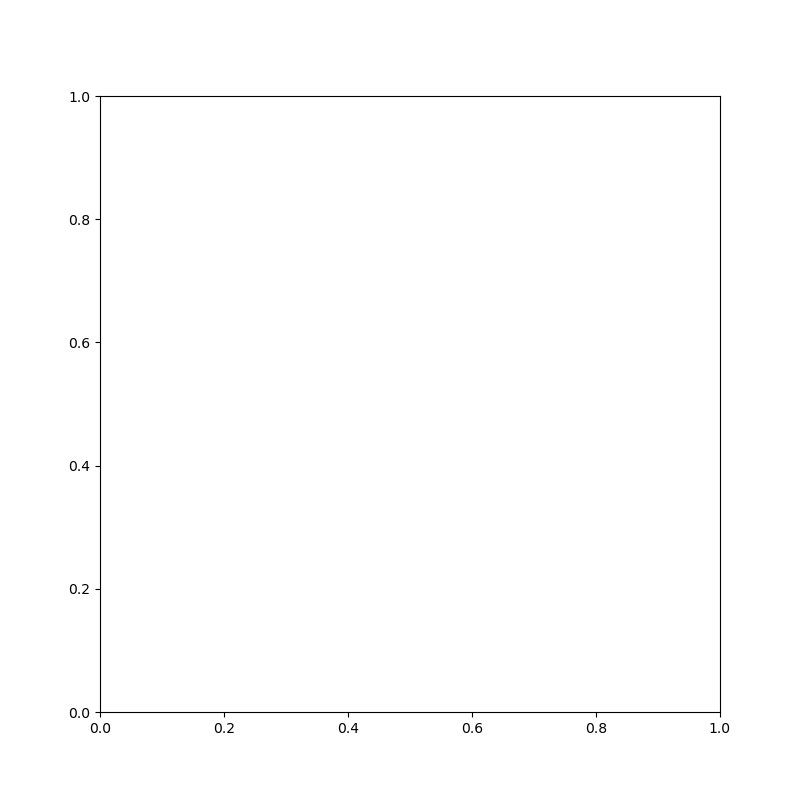

In [4]:
time_index = [2,2]
Stereo_plot = True
if Stereo_plot:
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    mean0_lst = []
    rot_lst = []
    crad_lst = []
    for r in run_scan:
        print(r)
        xpos,xinfo,ph,tm,evi,info_plus,\
        ph_cherry1,Cherry2,ph_calo_photonph_ph_scinti_desy,Scinti_after_magnet,ph_calo_photon,Calo_elect1,Calo_elect2,Apc1,Apc2,\
        x1,y1,x2,y2,x_cry,y_cry,theta_in_x,theta_in_y= file_corrector(r)
        theta_in_x = theta_in_x - 2000
        logix = (x2>pos_cut_x[0]) & (x2<pos_cut_x[1])
        logiy = (y2>pos_cut_y[0]) & (y2<pos_cut_y[1])

        logi_pos = logix & logiy
        logi_calo = (ph_calo_photon > calo_th)
        logi_scinti = (ph_calo_photonph_ph_scinti_desy > 100)
        logi_cherry = ph_cherry1 >21
        logi_angle = ((theta_in_x)**2 + (theta_in_y)**2) < (3000)**2
        logi_time = ((tm[:,2]-tm[:,6]) < -17 ) & (tm[:,2]-(tm[:,6]) > -21)
        
        if Calibration:
            calo_th = 0.1 #GeV
            ph_calo_photon =(ph_calo_photon - q)/m
            logi_calo = (ph_calo_photon > calo_th)
            logi = logi_pos & logi_calo & logi_angle & logi_cherry & logi_time
            # logi = logi_calo 
        else:
            calo_th = 0.1 #ADC
            logi_calo = (ph_calo_photon > calo_th)
            # logi = logi_calo & logi_pos
            logi = logi_calo
            
        ph0 = ph_calo_photon
        gonio = [xinfo[:,0], xinfo[:,1]]
        step = info_plus[:, 1]
        unique_step = np.unique(step)
        rot_step  = [gonio[0][step == i][0] for i in unique_step]
        crad_step = [gonio[1][step == i][0] for i in unique_step]
        phxstep0 = [ph0[step == i] for i in unique_step]
        mean0 = [np.mean(phxstep0[i]) for i in unique_step]

        mean0_lst += mean0
        rot_lst   += rot_step
        crad_lst  += crad_step
    # Converto in array di numpy
    mean0 = np.array(mean0_lst)
    rot = np.array(rot_lst)
    crad = np.array(crad_lst)
    plottaStereo(rot,crad,mean0,fig,ax,stereotype="MAX",Title="ph_calo_photon", labels =[''])         
    print(mean0)

In [ ]:
## Single Crystal alignement ##

In [ ]:
def gaussian_fit(hist, bins,arg):
    # Calculate bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Initial guess for the parameters
    initial_guess = [max(hist), bin_centers[np.argmax(hist)], np.std(arg)]
    
    # Fit the Gaussian model to the data
    params, _ = curve_fit(myGauss, bin_centers, hist, p0=initial_guess)
    
    # Create fitted data points
    x_fit = np.linspace(bins[0], bins[-1], 100)
    y_fit = myGauss(x_fit, *params)
    
    return params, x_fit, y_fit

i: 0		r: 720746
i: 1		r: 720749
i: 2		r: 720750
i: 3		r: 720751
i: 4		r: 720753
i: 5		r: 720771
i: 6		r: 720772
i: 7		r: 720774
i: 8		r: 720775
i: 9		r: 720778
i: 10		r: 720779
i: 11		r: 720776
I'lls show only the stereo
rot [-2.16644600e-09 -4.56841322e-05  2.46966175e+02], crad [7.54341755e-09 3.40320132e-04 2.43837927e+02]
rot -2702975.4421931133, crad 358247.8737604864


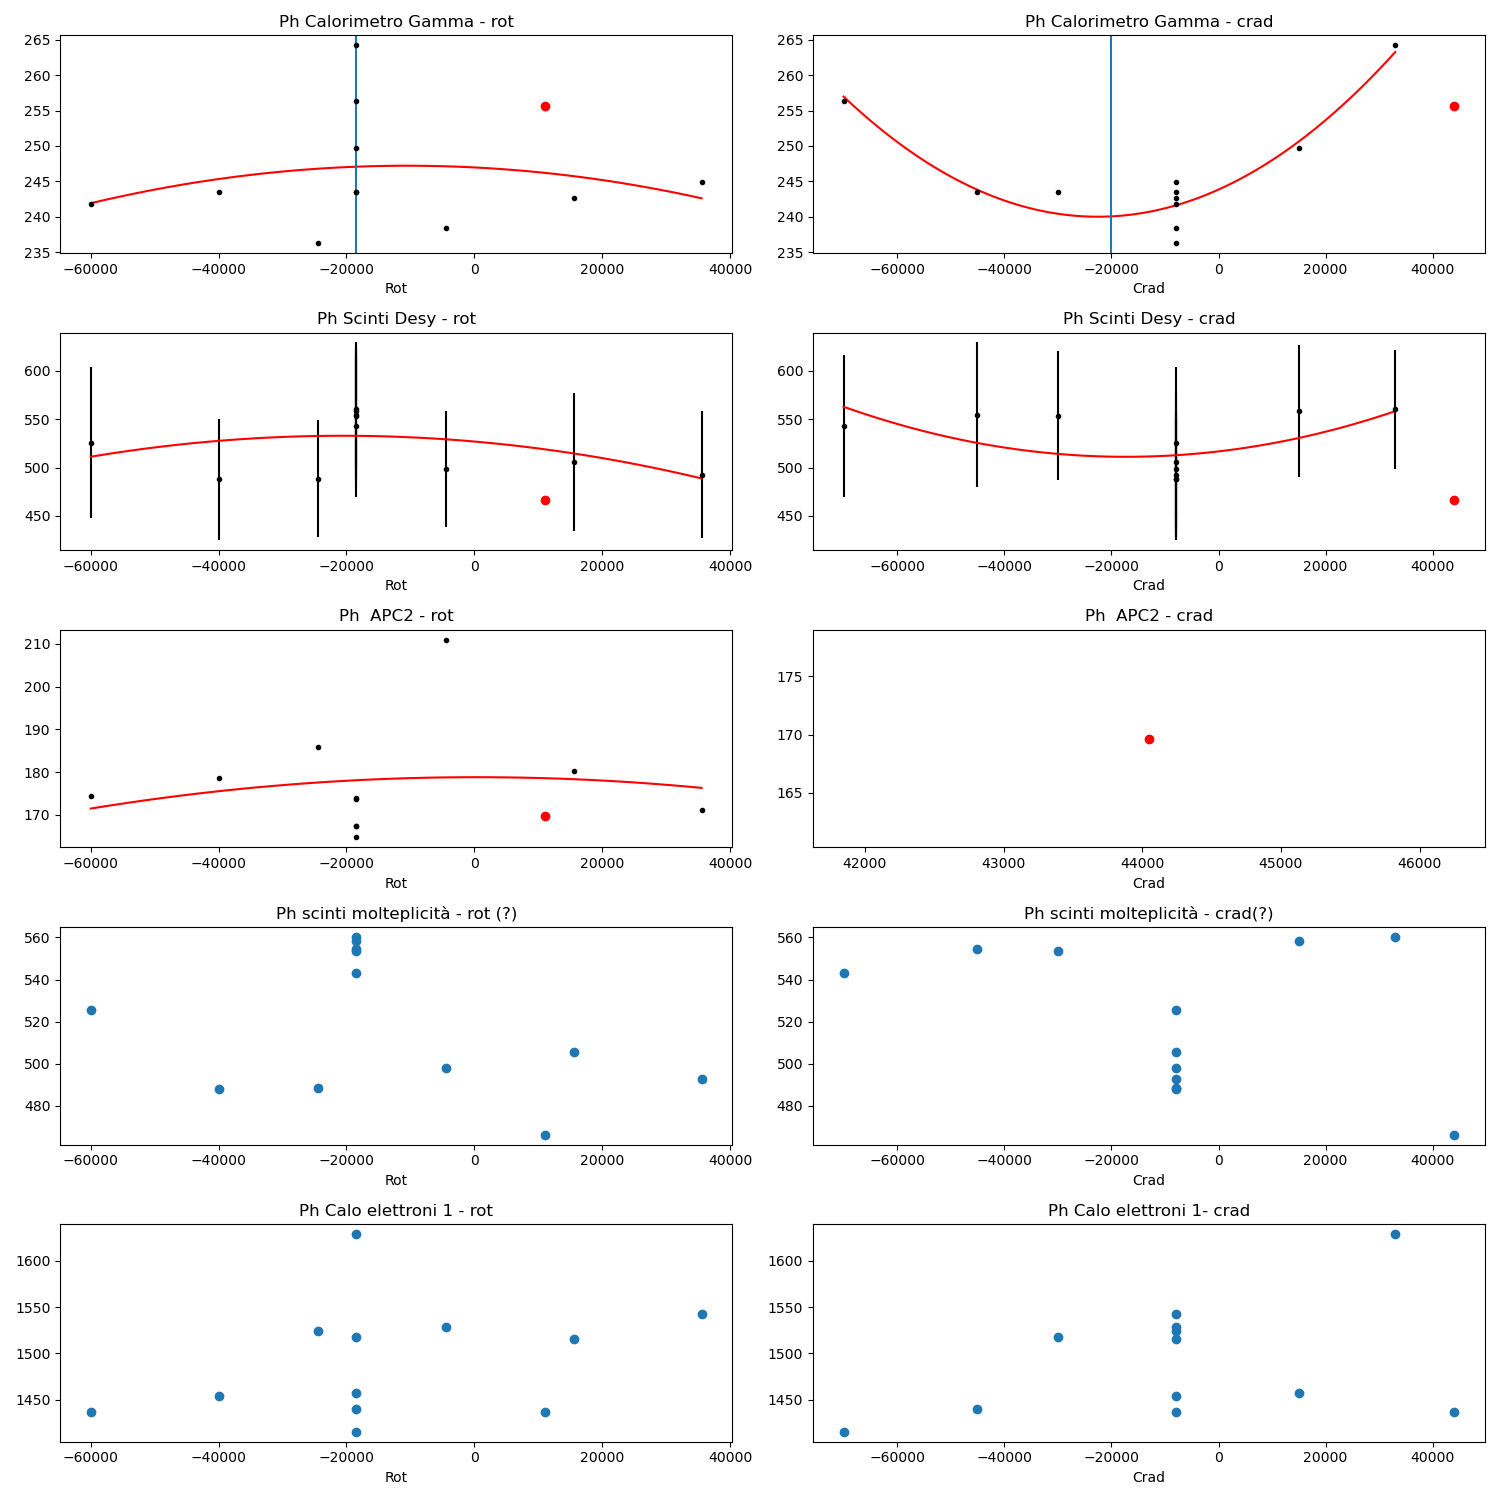

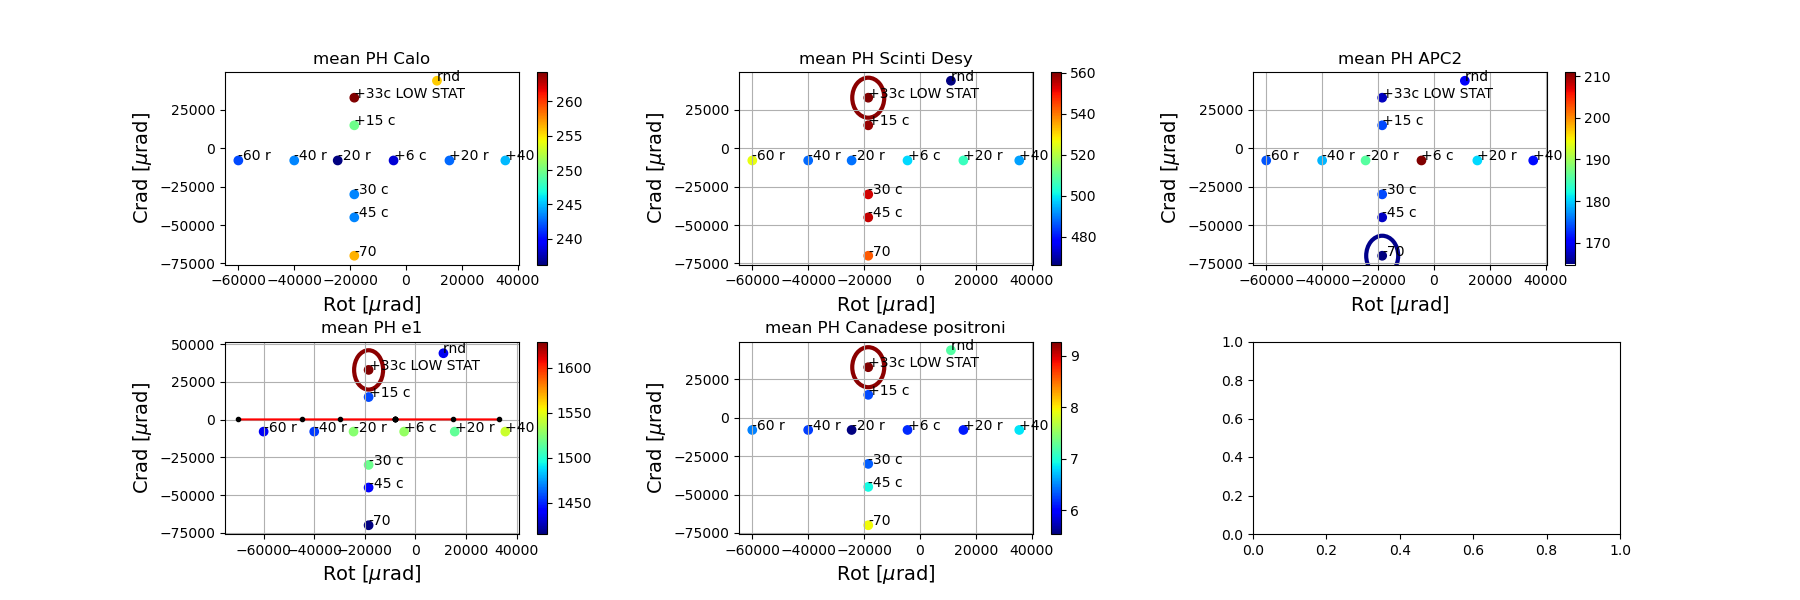

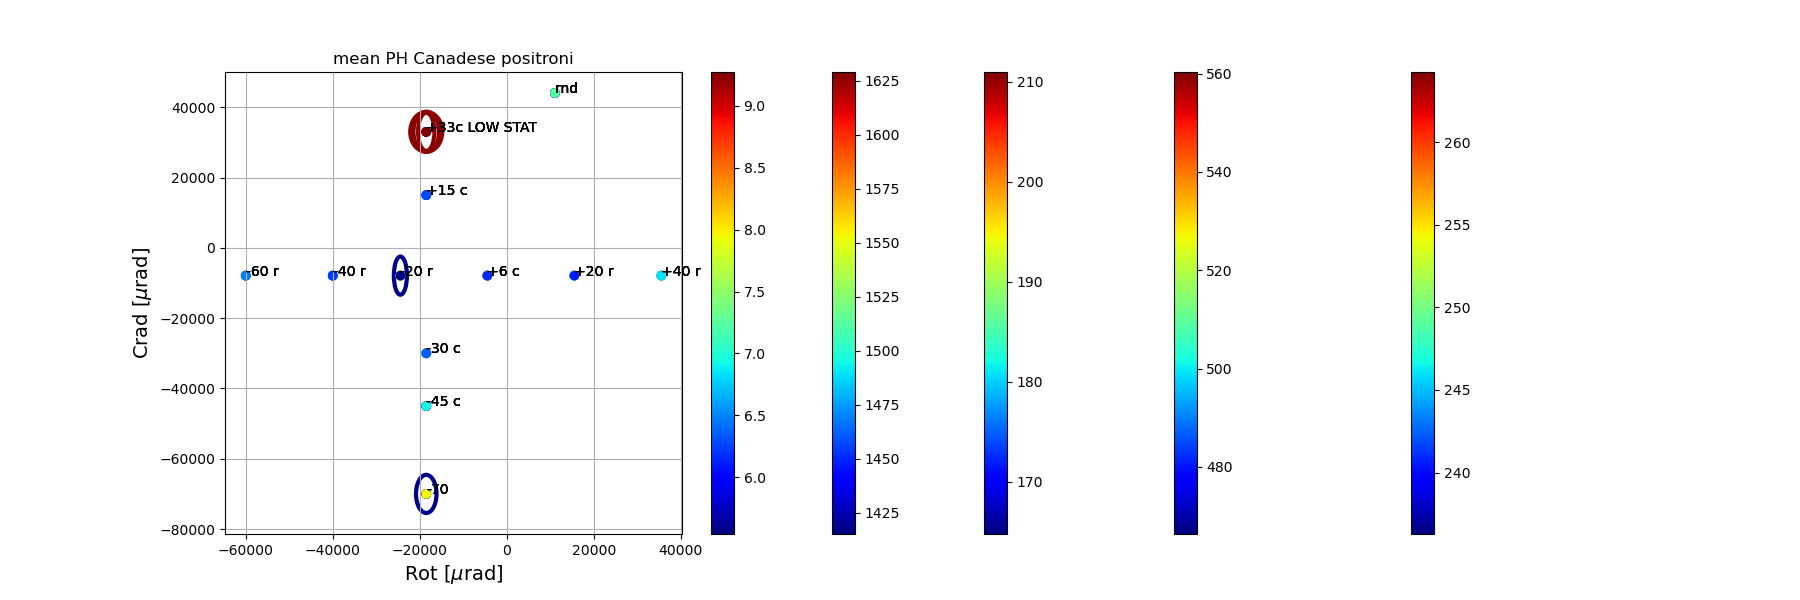

In [ ]:
## run_scan = [720746    ,720749   , 720750  , 720751   ,720752   ,720745    ,720747    ,720748    , 720753]
# labels = ['rnd '      ,'+20 r'  ,'-20 r'  , '+40 r'  , '+10 r' ,'-30 c'   ,'+30 c'   ,'-20 c'   , '+6 c'] 
# ev_lim = ['ok'        ,'ok'     ,'ok'     , 'ok'     , 'ok'    ,'ok'      ,140000    ,'ok'      , 'ok'] 


Crad_scan = False #False
Rot_scan = False #True
Full_stereo = True
if Full_stereo:
    run_scan = [720746    ,720749   , 720750  , 720751   , 720753, 720771, 720772,   720774 ,  720775    ,  720778 , 720779, 720776     ]
    labels = ['rnd '      ,'+20 r'  ,'-20 r'  , '+40 r'  , '+6 c', '-40 r','-60 r'   ,   '-30 c' ,  '+15 c'   ,  '-45 c', '-70' ,'+33c LOW STAT'    ] 
    ev_lim = ['ok'        ,'ok'     ,'ok'     , 'ok'      , 'ok'  , 'ok', 'ok', 'ok'  ,    'ok'    ,  'ok'   , 'ok'  ,'ok'  ]
if Rot_scan:
    run_scan = [720746    ,720749   , 720750  , 720751   , 720753, 720771, 720772]
    labels = ['rnd '      ,'+20 r'  ,'-20 r'  , '+40 r'  , '+6 c', '-40 r','-60 r'] 
    ev_lim = ['ok'        ,'ok'     ,'ok'     , 'ok'      , 'ok'  , 'ok', 'ok']
elif Crad_scan:
    # run_scan = [720746    ,720745    ,720747    ,720748    , 720753]
    # labels = ['rnd '      ,'-30 c'   ,'+30 c'   ,'-20 c'   , '+6 c'] 
    # ev_lim = ['ok'        ,'ok'      ,140000    ,'ok'      , 'ok' ]
    run_scan = [720746    ,    720774 ,  720775    ,  720778 , 720779, 720776    ]
    labels =   ['rnd '    ,   '-30 c' ,  '+15 c'   ,  '-45 c', '-70' ,'+33c LOW STAT'    ] 
    ev_lim =   ['ok'      ,     'ok'  ,    'ok'    ,  'ok'   , 'ok'  ,'ok'    ]

# run_scan = [720746    ,720729   ,720749   , 720750]#,720730]#]
# labels = ['amorphous ','+6 crad','+20 rot','-20 rot']#,'+30 mrad']#,] 
# ev_lim =['ok'         ,'ok'     ,'ok'     ,'ok']


time_index = [2,7] ##lG C and Padella UP
Stereo_plot = True
Calibration = False
max_padelle = False
t_density = True


range_e1 = (0, 400)
range_e2 = (0, 400)
range_desy = (0, 1000)
range_positron = (0, 10000)
range_apc2 = (0, 1500)

if Stereo_plot:
    fig, ax = plt.subplots(2,3, dpi  = 100)
    fig.set_size_inches(18, 6)
    fig.subplots_adjust(hspace = .4, wspace = .4)
    ax = ax.flatten()
    
    fig2, ax2 = plt.subplots()
    fig2.set_size_inches(18, 6)
    fig2.subplots_adjust(hspace = .4, wspace = .4)
    
    fig3, ax3 = plt.subplots(5,2, dpi  = 100)
    fig3.set_size_inches(15, 15)
    fig3.subplots_adjust(hspace = .4, wspace = .4)
    ax3 = ax3.flatten()
    
    mean0_lst, mean1_lst , mean2_lst, mean3_lst, mean4_lst = [], [], [], [], []
    y_err0, y_err1, y_err2, y_err3, y_err4 = [], [], [], [], []
    rot_lst = []
    crad_lst = []
    for i, r in enumerate(run_scan):
        print(f"i: {i}\t\tr: {r}")
        xpos,xinfo,ph,tm,evi,info_plus,\
        ph_cherry1,ph_cherry2,ph_scinti_desy,ph_scinti_after_magnet,ph_calo_photon,ph_calo_elect1,ph_calo_elect2,ph_apc1,ph_apc2,\
        x1,y1,x2,y2,x_cry,y_cry,theta_in_x,theta_in_y = file_corrector(r)
        theta_in_x = theta_in_x - 2000
        
        if ev_lim[i] != 'ok':
            logi_ev = evi <  ev_lim[i]
        else : 
            logi_ev = evi <  np.max(evi)
        
        logix = (x2>pos_cut_x[0]) & (x2<pos_cut_x[1])
        logiy = (y2>pos_cut_y[0]) & (y2<pos_cut_y[1])

        logi_pos = logix & logiy
        logi_time_calo = ((tm[:,2]-tm[:,6]) < -17 ) & (tm[:,2]-(tm[:,6]) > -21)
        logi_calo = (ph_calo_photon > calo_th)
        logi_scinti = (ph_scinti_desy > 100)
        logi_cherry = ph_cherry1 >21
        logi_angle = ((theta_in_x)**2 + (theta_in_y)**2) < (3000)**2
        logi_pad_UP_tm =  (abs((tm[:,7] - tm[:,6])) < 2)  ## -2,+2
        logi_pad_UP = (ph_scinti_desy>300) & logi_pad_UP_tm
        logi_apc2_time = ((tm[:,2]-tm[:,6]) < -19 ) & (tm[:,2]-(tm[:,6]) > -22)
        logi_apc2 = (ph_apc2>0) & logi_apc2_time
        
        
        if Calibration:
            calo_th = 0.1 #GeV
            ph_calo_photon = (ph_calo_photon - q)/m
            logi_calo = (ph_calo_photon > calo_th)
            # logi = logi_pos & logi_calo & logi_cherry & logi_time ## & logi_angle
            # logi = logi_calo & logi_ev & logi_cherry & logi_time_calo & logi_pad_UP
            logi = logi_calo & logi_ev & logi_cherry & logi_time_calo
            range_calo_photon = (0,6.5)
        else: 
            calo_th = 10 #ADC
            logi_calo = (ph_calo_photon > calo_th)
            # logi = logi_calo & logi_pos
            # logi = logi_calo & logi_ev & logi_cherry & logi_time_calo & logi_pad_UP
            logi = logi_calo & logi_ev & logi_cherry & logi_time_calo
            range_calo_photon = (0,np.max(ph_calo_photon))

        logi = logi & logi_pos
        
        gonio = [xinfo[:,0], xinfo[:,1]]
        step = info_plus[:,1]
        unique_step = np.unique(step)
        rot_step  = [gonio[0][step == ii][0] for ii in unique_step]
        crad_step = [gonio[1][step == ii][0] for ii in unique_step]

        # print("vvvvvvvvvvvv")
        # print(rot_step)
        # print(crad_step)
        # print(unique_step)
        # print("^^^^^^^^^^^^")
        
        # ph0 = ph_calo_photon
        # phxstep0 = [ph0[step == i] for i in unique_step]
        # mean0 = [np.mean(phxstep0[i]) for i in unique_step]
        
        mean0, mean1, mean2, mean3, mean4 = [], [], [], [], []
    
        for j in unique_step:
            # print(f"---- j = {j}")
            # print(f"---- rot= {rot_step,crad_step}")
            h0, binc0 = np.histogram(ph_calo_photon[logi], bins = 75, range = range_calo_photon, \
                                     density = t_density)
            # params0 ,_ , _ = gaussian_fit(h0, binc0,ph_calo_photon[logi])    
            # print(params0[2])
            # y_err0.append(params0[2])
            
            h1, binc1   = np.histogram(ph_scinti_desy[logi], bins = 75, range = range_desy, \
                                     density = t_density)
            params1 ,_ , _ = gaussian_fit(h1, binc1,ph_scinti_desy[logi])    
            # print(params1[2])
            y_err1.append(params1[2])
            
            h2, binc2 = np.histogram(ph_apc2[logi], bins = 75, range = range_apc2, \
                                     density = t_density)
            # params2 ,_ , _ = gaussian_fit(h2, binc2,ph_apc2[logi])    
            # print(params2[2])
            # y_err2.append(params2[2])
            
            h3, binc3 = np.histogram(ph_calo_elect1[logi], bins = 75, range = range_e1, \
                                     density = t_density)
            # params3 ,_ , _ = gaussian_fit(h3, binc3,ph_calo_elect1[logi])    
            # print(params3[2])
            # y_err3.append(params3[2])
            
            h4, binc4 = np.histogram(ph_scinti_after_magnet[logi], bins = 75, range = range_positron, \
                                     density = t_density)
            # params4 ,_ , _ = gaussian_fit(h4, binc4,ph_scinti_after_magnet[logi])    
            # print(params4[2])
            # y_err4.append(params4[2])
        if max_padelle:
            mean0.append(binc[np.argmax(h0)])
            mean1.append(binc[np.argmax(h1)])
            mean2.append(binc[np.argmax(h2)])    
            mean3.append(binc[np.argmax(h3)])    
            mean4.append(binc[np.argmax(h4)])    
        else:
            mean0.append(np.mean(ph_calo_photon[logi]))
            # print(f"----------------> Ho appeso a mean0: {mean0[-1]}")
            mean1.append(np.mean(ph_scinti_desy[logi]))
            mean2.append(np.mean(ph_apc2[logi]))    
            mean3.append(np.mean(ph_calo_elect1[logi]))    
            mean4.append(np.mean(ph_scinti_after_magnet[logi]))    
        
            mean0_lst += mean0
            mean1_lst += mean1
            mean2_lst += mean2
            mean3_lst += mean3
            mean4_lst += mean4
            rot_lst   += rot_step
            crad_lst  += crad_step
        # Converto in array di numpy
        mean0 = np.array(mean0_lst)
        mean1 = np.array(mean1_lst)
        mean2 = np.array(mean2_lst)
        mean4 = np.array(mean3_lst)
        mean3 = np.array(mean4_lst)
        rot = np.array(rot_lst)
        crad = np.array(crad_lst)

    # print(rot,crad,mean0)
    plottaStereo(rot,crad,mean0,fig,ax[0],labels=labels,stereotype=None,Title='mean PH Calo')         
    plottaStereo(rot,crad,mean1,fig,ax[1],labels=labels,stereotype="MAX",Title='mean PH Scinti Desy')         
    plottaStereo(rot,crad,mean2,fig,ax[2],labels=labels,stereotype="MIN",Title='mean PH APC2')   
    plottaStereo(rot,crad,mean3,fig,ax[3],labels=labels,stereotype="MAX",Title='mean PH e1')         
    plottaStereo(rot,crad,mean4,fig,ax[4],labels=labels,stereotype="MAX",Title='mean PH Canadese positroni')         
    # plottaStereo(rot,crad,mean2,fig,ax[2],labels,"MAX",'mean PH Magnet')   
    
    plottaStereo(rot,crad,mean0,fig2,ax2,labels,"MIN",'mean PH Calo')         
    plottaStereo(rot,crad,mean1,fig2,ax2,labels,"MAX",'mean PH Scinti Desy')         
    plottaStereo(rot,crad,mean2,fig2,ax2,labels,"MIN",'mean PH APC2')   
    plottaStereo(rot,crad,mean3,fig2,ax2,labels,"MAX",'mean PH e1')         
    plottaStereo(rot,crad,mean4,fig2,ax2,labels,"MAX",'mean PH Canadese positroni')   
    # plottaStereo(rot,crad,mean2,fig2,ax2,labels,"MAX",'mean PH Magnet')         

    if len(rot[1:])> 2:
        params0_r = quadratic_fit(rot[1:],mean0[1:],0,fig3,ax3[0])
        params0_c = quadratic_fit(crad[1:],mean0[1:],0,fig3,ax3[1])
        params1_r = quadratic_fit(rot[1:],mean1[1:],y_err1[1:],fig3,ax3[2])
        params1_c = quadratic_fit(crad[1:],mean1[1:],y_err1[1:],fig3,ax3[3])
        params2_r = quadratic_fit(rot[1:],mean2[1:],0,fig3,ax3[4])
        params2_c =quadratic_fit(crad[1:],mean2[1:],0,fig3,ax[3])
        print(f'rot {params0_r}, crad {params0_c}')
        print(f'rot {params0_r[2]/(2*params0_r[1])}, crad {params0_c[2]/(2*params0_c[1])}')
    else:
        ax3[0].scatter(rot[1:],mean0[1:])
        ax3[1].scatter(crad[1:],mean0[1:])
        ax3[2].scatter(rot[1:],mean1[1:])
        ax3[3].scatter(crad[1:],mean1[1:])
        ax3[4].scatter(rot[1:],mean2[1:])
        ax3[5].scatter(crad[1:],mean2[1:])
    
    ax3[0].scatter(rot[0],mean0[0], c = 'r')
    ax3[1].scatter(crad[0],mean0[0], c = 'r')
    ax3[0].set_title('Ph Calorimetro Gamma - rot')
    ax3[1].set_title('Ph Calorimetro Gamma - crad')
    ax3[0].set_xlabel('Rot')
    ax3[1].set_xlabel('Crad')
    ax3[0].axvline(x = -18500 )
    ax3[1].axvline(x = -20000 )
    # print(f'{params0_r[0]:.2f}, {params0_c[0]:.2f}')

    
    ax3[2].scatter(rot[0],mean1[0], c = 'r')
    ax3[3].scatter(crad[0],mean1[0], c = 'r')
    ax3[2].set_title('Ph Scinti Desy - rot')
    ax3[3].set_title('Ph Scinti Desy - crad')
    ax3[2].set_xlabel('Rot')
    ax3[3].set_xlabel('Crad') 
    
    ax3[4].scatter(rot[0],mean2[0], c = 'r')
    ax3[5].scatter(crad[0],mean2[0], c = 'r')
    ax3[4].set_title('Ph  APC2 - rot')
    ax3[5].set_title('Ph  APC2 - crad')
    ax3[4].set_xlabel('Rot')
    ax3[5].set_xlabel('Crad')
  
    ax3[6].scatter(rot,mean1)
    ax3[7].scatter(crad,mean1)
    ax3[6].set_title('Ph scinti molteplicità - rot (?)')
    ax3[7].set_title('Ph scinti molteplicità - crad(?)')
    ax3[6].set_xlabel('Rot')
    ax3[7].set_xlabel('Crad')

    ax3[8].scatter(rot,mean3)
    ax3[9].scatter(crad,mean3)
    ax3[8].set_title('Ph Calo elettroni 1 - rot')
    ax3[9].set_title('Ph Calo elettroni 1- crad')
    ax3[8].set_xlabel('Rot')
    ax3[9].set_xlabel('Crad')
    
# print()

# print(crad)
# print(rot)
# print(labels)
# print(f'calo gamma \n{mean0}')
# print(f'desy \n{mean1}')
# print(f'apc2 \n{mean2}')
# print(f'e1 \n{mean3}')
# print(f'positroni \n{mean4}')
plt.tight_layout()
plt.show()